# Выявление закономерностей, определяющих успешность игр.

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Задача

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Необходимо отработать принцип работы с данными.

# Шаг 1 Открыть файлы и изучить общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
# прочитаем файлы:

try:
    df = pd.read_csv("games.csv")
except:
    try:
        df = pd.read_csv("/datasets/games.csv")
    except:
        df = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")
        
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Вывод

В качестве исходных данных предоставлена таблица, состоящая из 11 колонок и 16715 непустых строк. Имеются следующие проблемы:
* названия строк начинаются с верхнего регистра; решение - привести к нижнему регистру
* год выпуска - тип данных float64; решение: привести к целому числу
* имеется большое кличество пропусков; решение: заполнить пропуски где это возможно
* два последних столбца имеют тип данных - object, что не соответствует описанию; решение: привести к целому числу

# Шаг 2 Подготовка данных

## 2.1 Обработка названий столбцов

In [6]:
col_name_lower = df.columns.str.lower()

df.columns = col_name_lower
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2.2 Обработка пропусков и приведение данных к нужным типам

В name и genre всего по два пропуска:

In [7]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в обоих столбцах в одних и тех же строках. Удалим, т.к. заполнить их не представляется возможным

In [8]:
df = df.dropna(subset=['name'])

В year_of_release пропусков не так много, взглянем на них и посчитаем количество пропусков и долю

In [9]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
nan_count = df['year_of_release'].isna().sum()/len(df['year_of_release'])

In [11]:
print(f'Доля пропусков составляет {nan_count:.1%}')

Доля пропусков составляет 1.6%


Из визуального осмотра, видно, что в названии некоторых игры есть год, но не факт, что он подтверждает год выхода. Заполнять пропуски не будет, ведь доля пропусков составляет всего 1,6%.
Удалим пропуски, приведем к целому числу

In [12]:
df = df.dropna(subset=['year_of_release'])

df['year_of_release'] = df['year_of_release'].astype('int')

В critic_score много пропусков, взглянем на них

In [13]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что пропуски в данном столбце соответствуют пропускам в user_score и rating

В данном столбце есть также пропуски tdb

In [14]:
df[df['user_score']=='tbd']['user_score']

119      tbd
301      tbd
520      tbd
645      tbd
718      tbd
        ... 
16695    tbd
16697    tbd
16698    tbd
16704    tbd
16706    tbd
Name: user_score, Length: 2376, dtype: object

Абревиатура 'tbd' (to be defined) означает, что данные скоро будут обнародованы. Для нас это все равно, что пропуск. Поэтому с помощью метода to_numeric приведем тип данных данного столбца к числовому и параллельно строки 'tbd' заменятся на NaN

In [15]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Пропуски в столбцах critic_score и user_score заменим на служебное (-1), чтобы в дальнейшем можно было проводить анализ

In [16]:
df['critic_score'] = df['critic_score'].fillna(-1)

df['user_score'] = df['user_score'].fillna(-1)

А также заменим тип данных в колонке critic_score на целочисленный

In [17]:
df['critic_score'] = df['critic_score'].astype('int')

В столбце rating заменим все пропуски на 'unknown', т.е. рейтинг неизвестный. Так сможем учесть эти данные при дальнейшем анализе

In [18]:
df['rating'] = df['rating'].fillna('unknown')

## 2.3 Проверка на дубликаты

In [19]:
df.duplicated().sum()

0

Дубликаты отсутствуют

## 2.4 Суммарные продажи

Добавим к исходной таблице столбец, в котором будет сумма продаж по всем регионам планеты для каждой игры

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## Выводы

* Скорректировали название столбцов
* Обработали пропуски, в том чиле скрытые, такие как tbd
* Привели данные к нужному типу
* Проверили дубликаты
* Посчитали суммарные продажи

# Шаг 3 Исследовательский анализ данных

## 3.1 Распределения количествао выпущенных игр по годам

In [21]:
# с помощью сводной таблицы сгруппируем данные по годам и посчитаем количество выпущенных игр для каждого года
year_games_counta = df.pivot_table(index='year_of_release', aggfunc={'name':'nunique'})
year_games_count = df.pivot_table(index='year_of_release', aggfunc={'name':'count'})
year_games_count.columns = ['counts_of_games']
year_games_count
year_games_counta

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


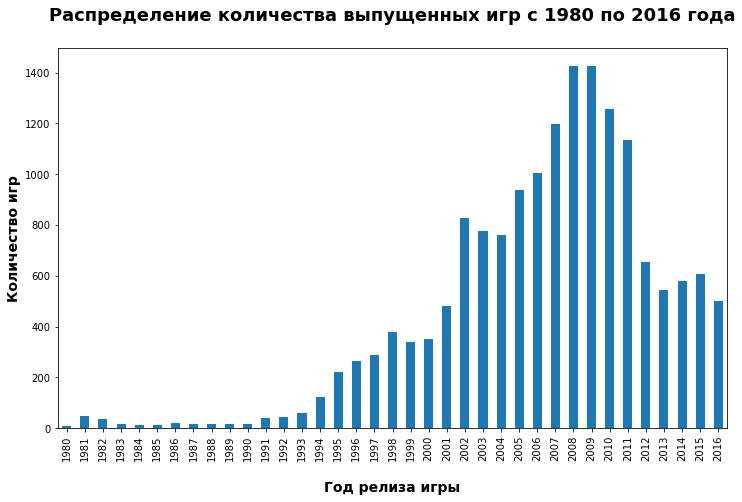

In [22]:
# построим график распределения количества выпущенных игр 

year_games_count.plot(y='counts_of_games', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение количества выпущенных игр с 1980 по 2016 года\n', fontsize=18, fontweight="bold")
plt.xlabel("\nГод релиза игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold");

Видим что произошел скачок в разработке игр после 1993 года, так продолжалось до 2009 года, после чего пошел спад и резкое падение в разработке в 2012 году

Для нашего анализа данные за весь предоставленный период не нужны, а нужны только те, которые отражают тенденции последних лет. Оптимально будет взять данные за последние 5 лет

In [23]:
df = df.loc[df['year_of_release'] > 1993]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


## 3.2 Изменение продаж по платформам

Определим десять платформ с наибольшими суммарными продажами и построим гистограммы распределения продаж для каждой из этих платформ

 определим так называемый "ТОП" с помощью графика</b>

In [24]:
platform_sales_sum = (df
                      .pivot_table(index=['platform'], aggfunc={'total_sales':sum})
                      .sort_values(by='total_sales', ascending=False)
)
platform_sales_sum 

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


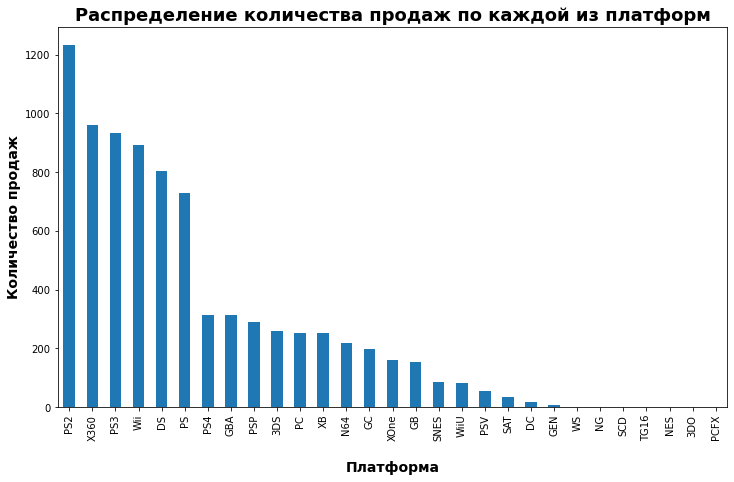

In [25]:
# построим график распределения количества выпущенных игр 

platform_sales_sum.plot(y='total_sales', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение количества продаж по каждой из платформ', fontsize=18, fontweight="bold")
plt.xlabel("\nПлатформа", fontsize=14, fontweight="bold")
plt.ylabel("Количество продаж", fontsize=14, fontweight="bold");

По графику видно, что значительная разница выручки между платформами до PS и после PS4 включительно. Из чего делаем вывод, что "ТОП" это все платформы раположенные на графике левей PS (включительно). Тем самым выделяем 6 платформ

In [26]:
platform_sales_sum = (df
                      .pivot_table(index=['platform'], aggfunc={'total_sales':sum})
                      .sort_values(by='total_sales', ascending=False)
                      .head(6)
)
platform_sales_sum 

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58


In [27]:
# создадим новый датафрэйм отфильтрованный по топ-6 платформ:

change_platform_yaers = df.query('platform in @platform_sales_sum.index')
change_platform_yaers

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Гистограммы построим при помощи цикла:

In [28]:
# создаем список с временным диапазоном от 1993 г, т.к. считаем, что игры выпушенные ранее нам не интересны:

years_list = []
for i in range(1993, 2017):
    years_list.append(i)

In [29]:
# создаем список с названиями платформ:

platform_list = change_platform_yaers['platform'].unique()

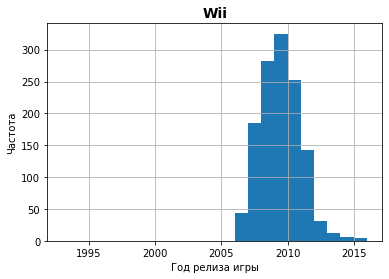

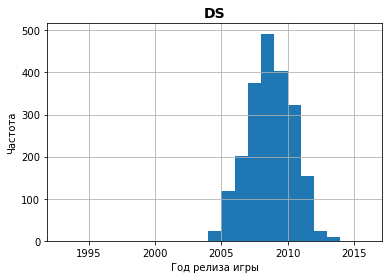

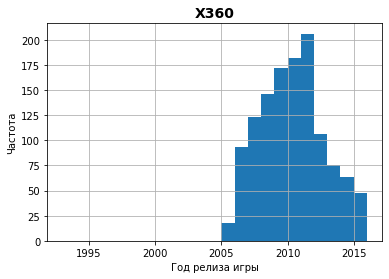

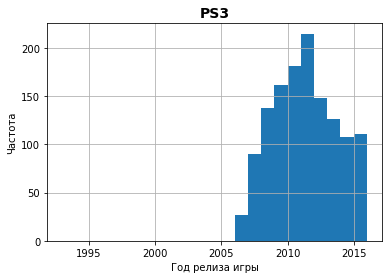

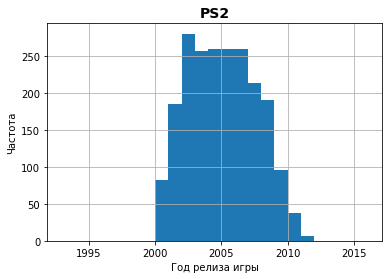

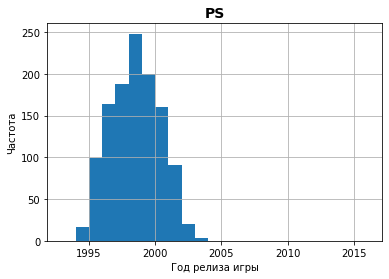

In [30]:
# цикл для построения гистограмм:

for j in range(0, len(platform_list)):
    change_platform_yaers[change_platform_yaers['platform']==platform_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=platform_list[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

Графики наглядно представляют поведение платформы за время ее существования, все ее взлеты и падения. Например по графику платформы PS, PS2, PS3 видно, что резкий спад выпуска игр предыдущей платформы, обсуловлен выходом на рынок новой платформы, что очевидно.
На всех консольных платформах наблюдался резкий скачок продаж в начале и конце существования.

Будем считать, что если продаж в год приближается к нулю, значит компания более не существует.
Построим гистограмы показывающие отношение количества выпускаемых игр в год.

Также лучше применить медиану для оценки продолжительности жизни, т.к. есть платформы "умершие" очень быстро, в течение одного двух лет.

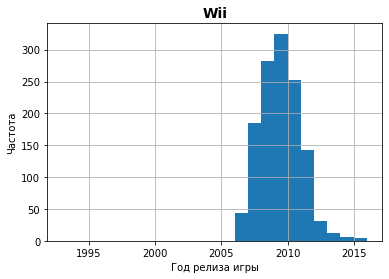

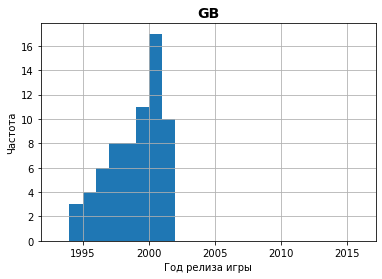

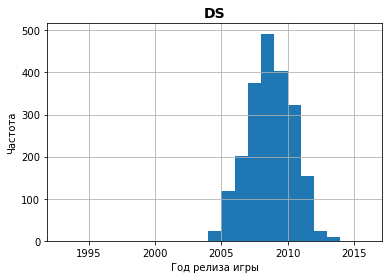

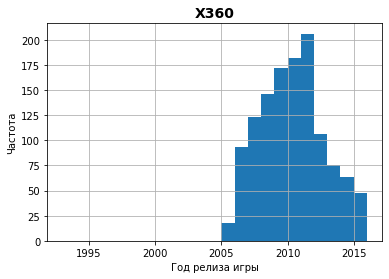

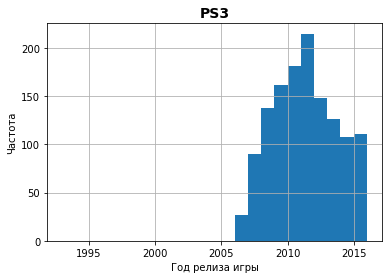

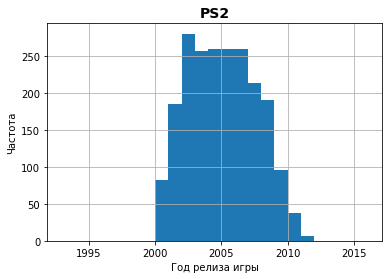

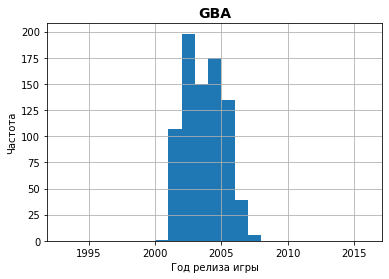

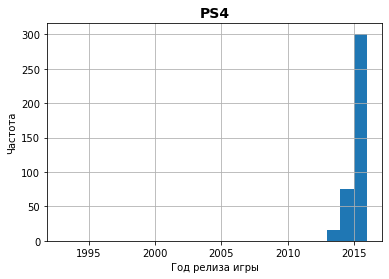

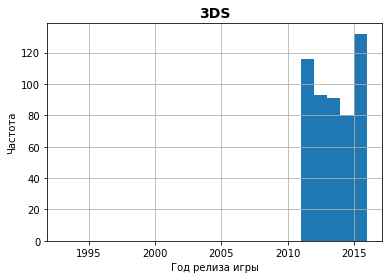

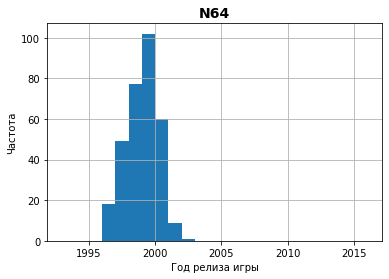

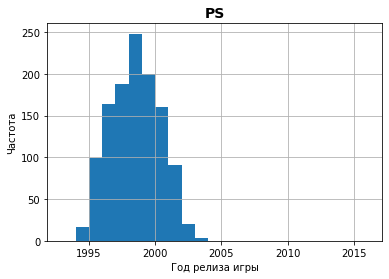

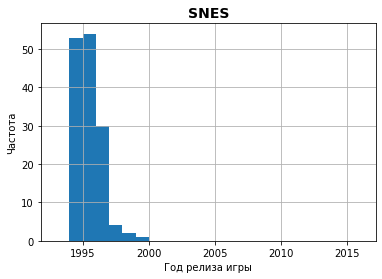

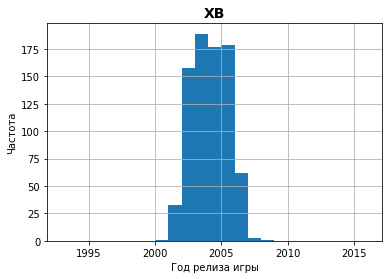

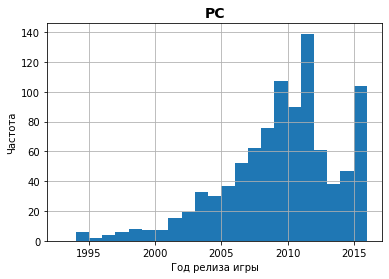

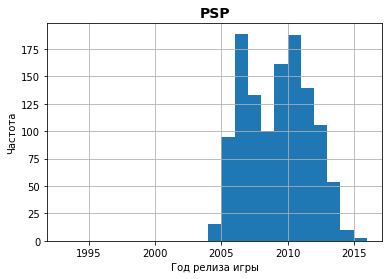

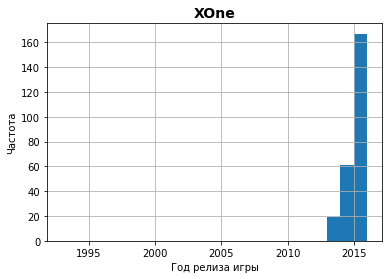

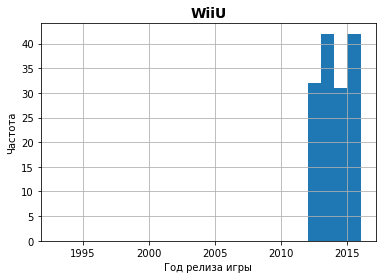

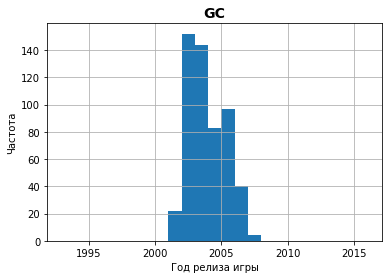

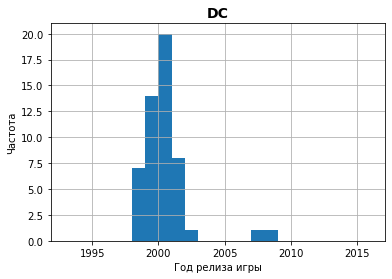

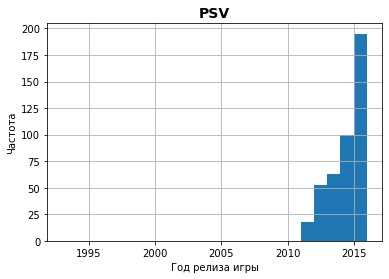

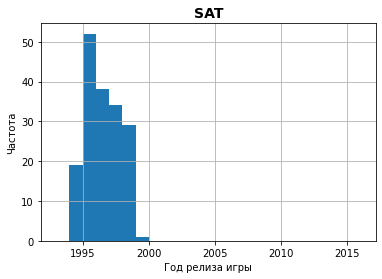

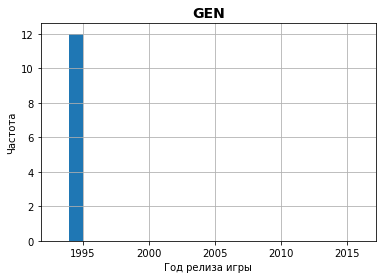

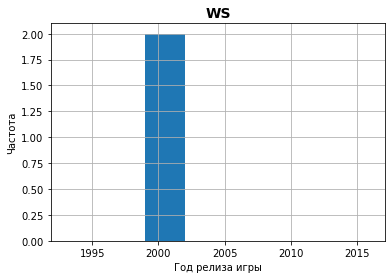

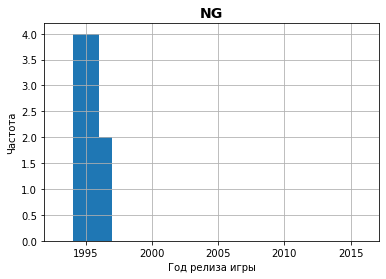

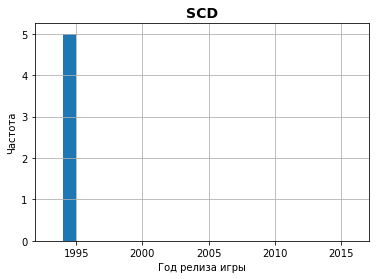

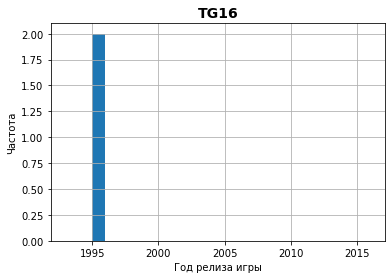

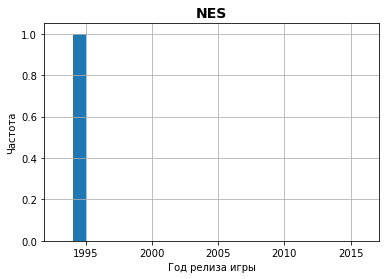

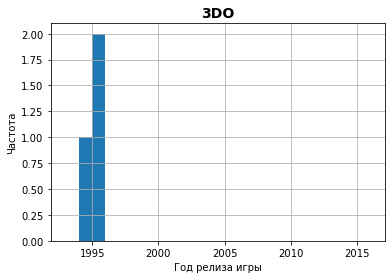

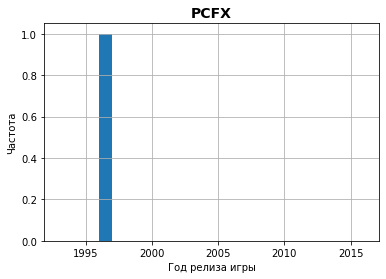

In [31]:
# строим гистограммы распределения продаж для всех платформ на основании исходного датафрейма
import matplotlib.pyplot as plt
all_platform_list = df['platform'].unique()

for i in range(0, len(all_platform_list)):
    df[df['platform']==all_platform_list[i]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=all_platform_list[i], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

In [32]:
platform_games_count = (df
                      .pivot_table(index='platform', values='year_of_release', aggfunc='count')
)
platform_games_count.columns = ['games_count']
platform_games_count.sort_values(by='games_count',ascending=False)

,games_count
platform,
PS2,2127
DS,2120
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,950
GBA,811


 будем считать, что платформа, выпустившая менее 50 игр, неуспешная </b>


Визуально пробежавшись по графикам, создадим список в который войдут те платформы, которое нужно исключить из данного анализа по причине того, что они еще "живые"

In [33]:
# исключающий список, по которому будем фильтровать

platform_exclude = ['PC', 'X360', 'PS3', '3DS', 'PSV', 'WiiU', 'XOne', 'PS4']

In [34]:
# с помощью сводной таблицы вычислим разность между годом окончания существования платформы и началом
platform_lifetime = df.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max, 'count'])
platform_lifetime.columns = ['beginnig', 'end', 'count']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['beginnig']

# отфильтруем полученную таблицу по списку platform_exclude
platform_lifetime_filtred = (platform_lifetime
                     .reset_index()
                     .query('platform not in @platform_exclude')
                     .query('count > 50')
                    )
platform_lifetime_filtred

,platform,beginnig,end,count,duration
2,DC,1998,2008,52,10
3,DS,2004,2013,2120,9
4,GB,1994,2001,67,7
5,GBA,2000,2007,811,7
6,GC,2001,2007,542,6
8,N64,1996,2002,316,6
13,PS,1994,2003,1190,9
14,PS2,2000,2011,2127,11
17,PSP,2004,2015,1193,11
19,SAT,1994,1999,173,5


In [35]:
mean_lifetime = platform_lifetime_filtred['duration'].mean()
print(f'Средний срок жизни платформы составляет: {mean_lifetime} лет')

Средний срок жизни платформы составляет: 8.0 лет


## 3.3 Потенциально прибыльные платформы

Для дальнейшего анализа выберем данные за последние несколько лет, т.к. они отражают последние тенденции и на их основании можно делать различные предположения о будущем поведении

Актуальным периодом будем считать последние 5 лет (2012 - 2016 года)

Сделаем срез данных по этому периоду

 Для выбора оптимального интервала для прогноза вернемся к графику "Распределение количества выпущенных игр с 1980 по 2016 года". По нему видно, что был резкий спад выпуска игр в 2012 г во всей индустрии по той или иной причине, после чего выпуск игр стабилизировался. Соответсвенно, тот аномальный спад нам не стоит учитывать </b>


In [36]:
relevant_years = []
for i in range(2012, 2017):
    relevant_years.append(i)

df_relevant = df.query('year_of_release in @relevant_years')
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Посмотрим какие платформы лидируют по суммарным продажам в этом периоде времени:

In [37]:
rel_platform_sales_sum = (df_relevant
                          .pivot_table(index='platform', values='total_sales', aggfunc=sum)
                          .sort_values(by='total_sales', ascending=False)
                         )
rel_platform_sales_sum

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


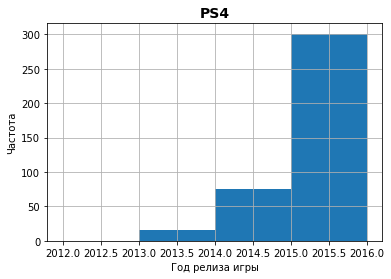

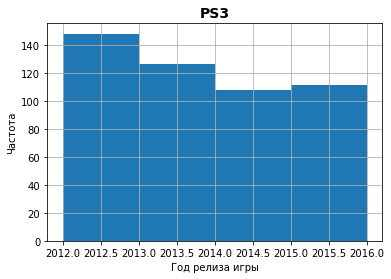

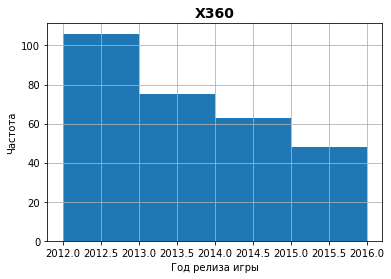

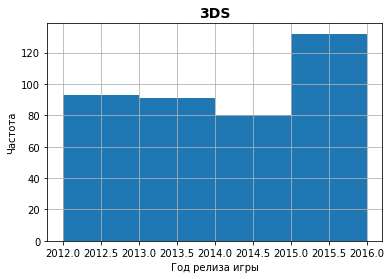

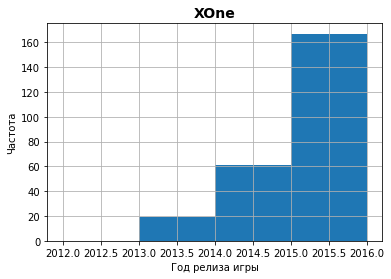

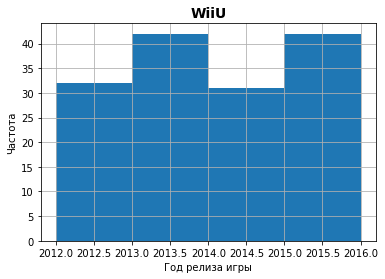

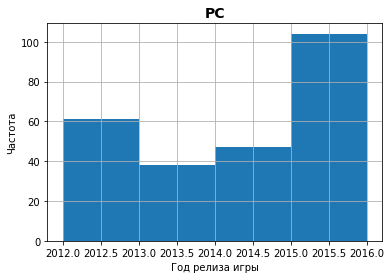

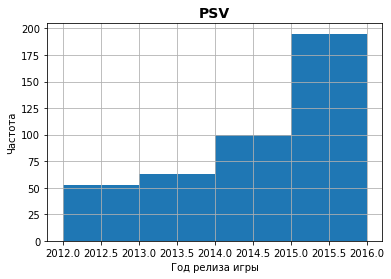

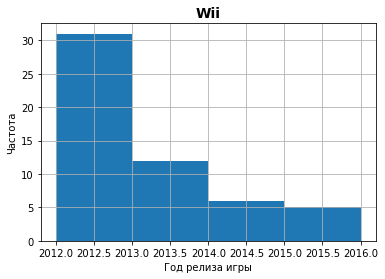

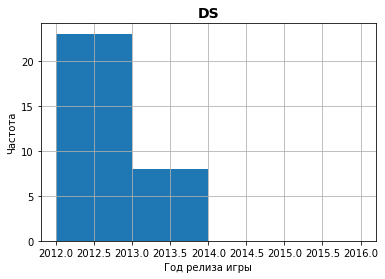

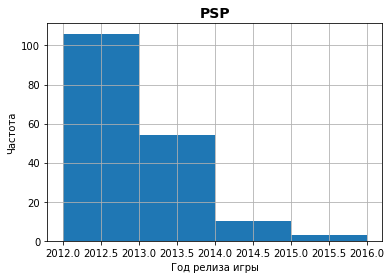

In [38]:
# построим гистограммы продаж платформ
for j in range(0, len(rel_platform_sales_sum.index)):
    df_relevant[df_relevant['platform']==rel_platform_sales_sum.index[j]]\
    .plot(kind='hist', bins=relevant_years, legend=False, title=rel_platform_sales_sum.index[j], grid=True)
    
    plt.title(label=rel_platform_sales_sum.index[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

 По графикам видно, что у платформ, таких как: X360, Wii, DS, PSP наблюдается спад продаж, в то время как у таки платформ, как: PS4, 3DS, XOne, PC, PSV наблюдается рост, а у платформ: PS3 и WiiU заметна стабильность  </b>


In [39]:
# посмотрим сколько было платформ в исходном датасете

len(df['platform'].unique())

29

В актуальном периоде, который мы выбрали, из 31 платформы остались только 11. Из этих 11 платформы X360, Wii, DS, PSP можно исключить из потенциально прибыльных платформ, т.к. DS уже прекратила свое существование, у PSP продажи практически равно нулю, у остальных наблюдается спад продаж.
Считаем, что рост и стабильность - важный критерий перспеткивности платформы.
Список потенциально прибыльных платформ в актуальном периоде выглядит так:

In [40]:
relevant_platforms = ['PS4', 'PS3', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

## 3.4 Диаграммы размаха по продажам игр

In [41]:
df_relevant_box = df.query('platform in @relevant_platforms')
df_relevant_box

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63,5.8,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


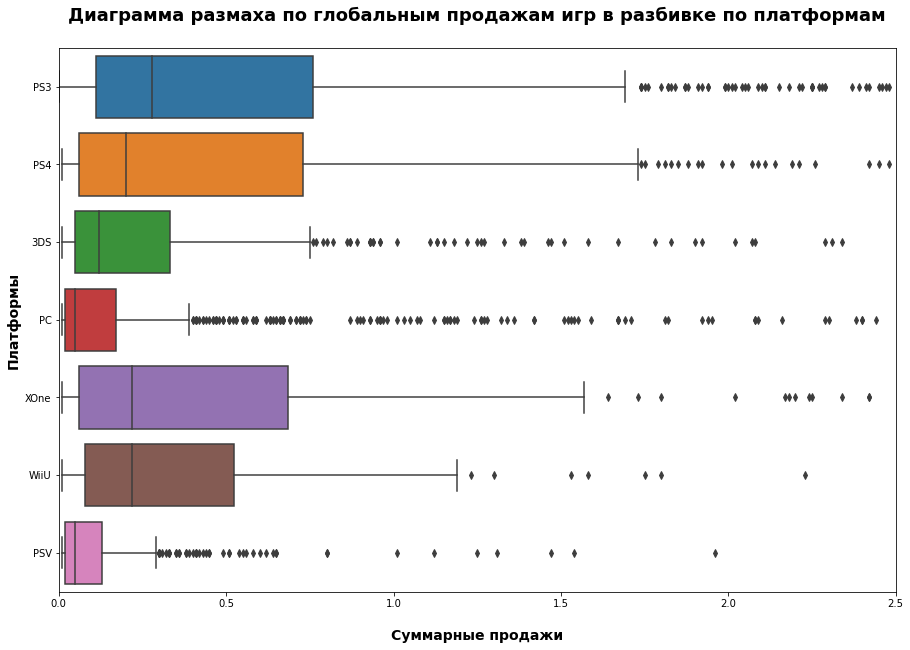

In [42]:
# построим все "ящики с усами" на одном графике для удобства
# используем библиотеку seaborn

plt.figure(figsize=(15,10))
sns.boxplot(data=df_relevant_box, x='total_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5);

По данным диаграммам легко определить была ли популярна платформа в интересующий нас отрезок времени. Определить можно по объему продаж, входящему в межквартильный размах и медианному значению, чем они выше тем популярнее платформа. Например PS4 или X360 несомненно популярны

 По графикам видно, что у платформы PS3, PS4, XOne являются лидерами, но известно, что PS3 все же перспективная, т.к. ей на смену вышла PS4. Что же касается других платформ, 3DS, PC, PSV абсолютно проигрывают в суммарных продажах, WiiU же находится в серединке

## 3.5 Зависимость продаж от оценок критиков и пользователей

Выберем несколько популярных и потенциально прибыльных платформ и посмотрим как продажи на этих платформах зависят от оценок игр

In [43]:
#'почистим' данные, удалив служебные значения с целью просчета корреляции
df_relevant_cor = df_relevant[(df_relevant['user_score'] >= 0)&(df_relevant['critic_score'] >= 0)]

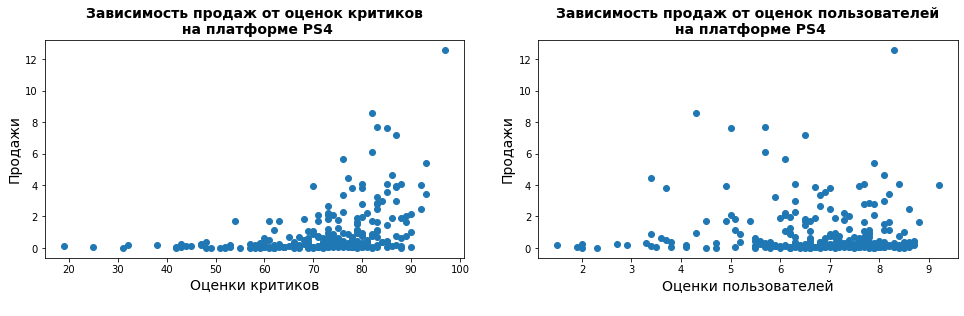

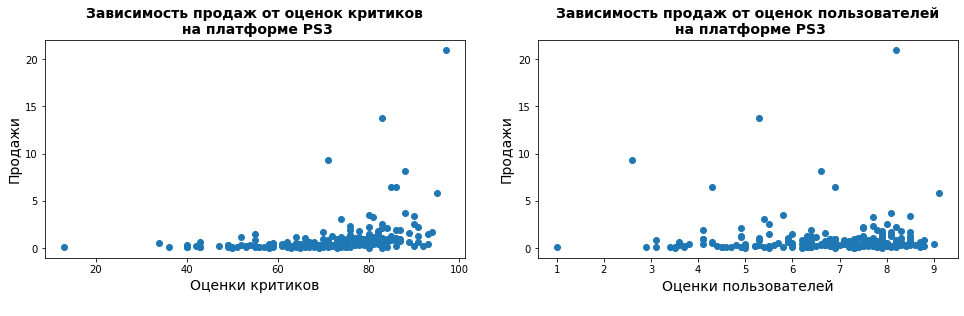

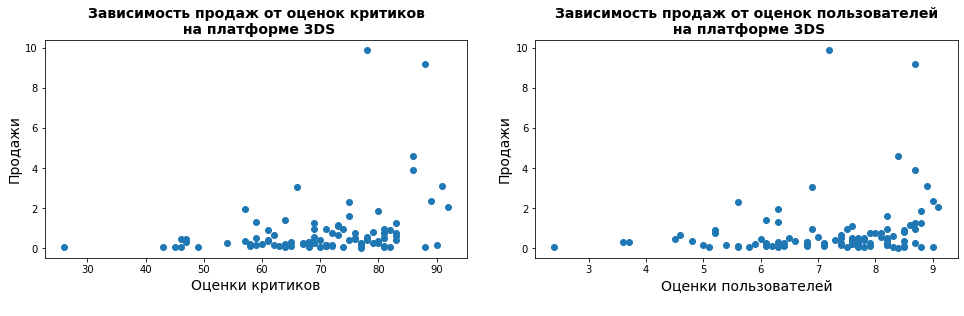

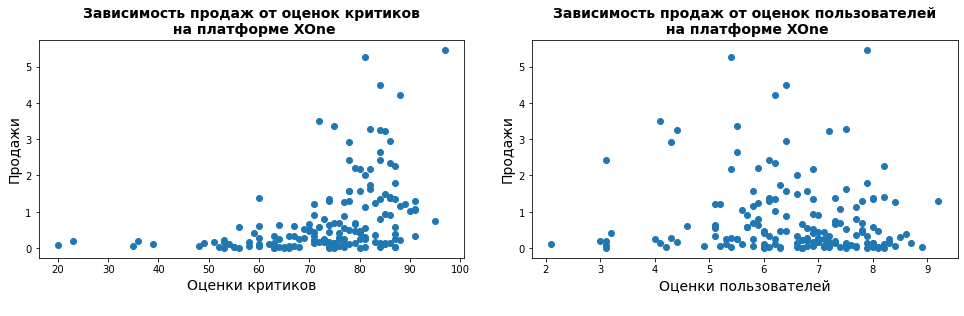

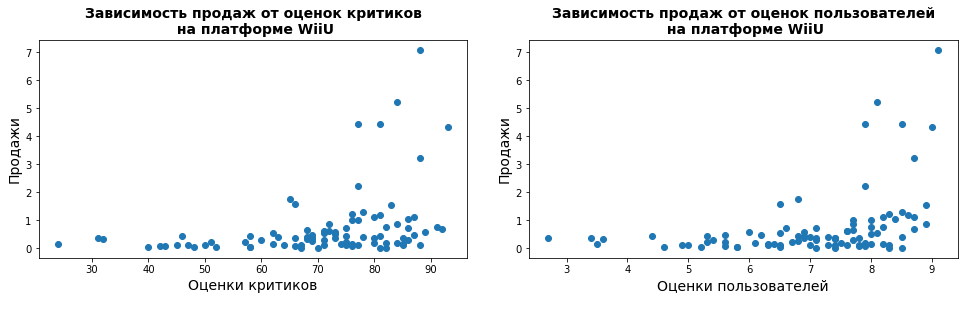

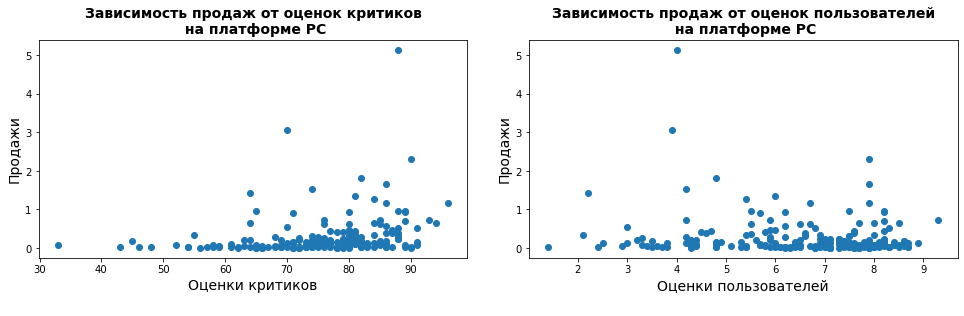

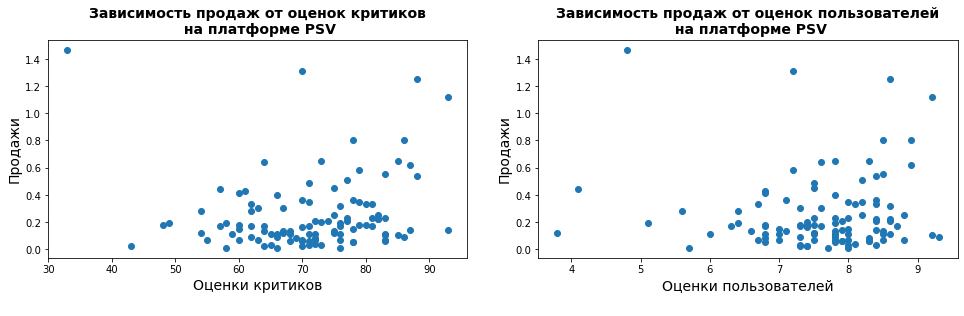

In [44]:
# используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей расположим рядом слева и справа соответственно

for name_platform in relevant_platforms:
    x_critic = df_relevant_cor[df_relevant_cor['platform']==name_platform]['critic_score']
    y_critic = df_relevant_cor[df_relevant_cor['platform']==name_platform]['total_sales']
    
    x_user = df_relevant_cor[df_relevant_cor['platform']==name_platform]['user_score']
    y_user = df_relevant_cor[df_relevant_cor['platform']==name_platform]['total_sales']
    
    
    fig = plt.figure(figsize=(13.5, 4.5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

По графикам видно, что у некоторых платформ продажи растут при высоких оценках критиков (от 60 единиц), примерно ткая же ситуация и по оценкам пользователей (от 4 единиц)
Посмотрим что покажут нам цифры в целом.

In [45]:
#посчитаем корреляцию между отзывами и продажами
df_relevant_cor[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.517727,0.000597
critic_score,0.517727,1.000000,0.306516
total_sales,0.000597,0.306516,1.000000


Видим, что в целом по индустрии оценка критиков и пользователей влияет на продажи, при чем влияние критиков выше

Посчитаем корреляцию между отзывами и продажами на примере платформы PS4

In [46]:
#сформируем срез
df_relevant_cor_PS4 = df_relevant_cor.loc[df_relevant_cor['platform'] == 'PS4']
#посчитаем корреляцию
df_relevant_cor_PS4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


 Видим, что связь между оценкам пользователей и продажами отсутсвтует, в то время как связь между оценками критиков и продажами - умеренная 

## 3.6 Общее распределение игр по жанрам

Рассмотрим как распределяются игры в зависимости от жанра

Сначала оценим количественное распределение по жанрам:

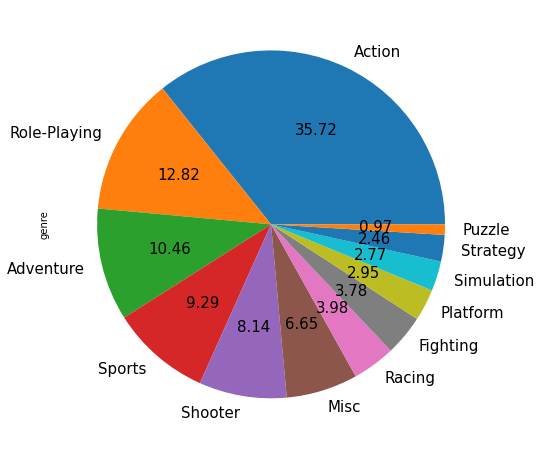

In [47]:
df_relevant['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False, autopct='%.2f', fontsize=15);

Жанр Action отрезал себе львиную долю пирога (наверное потому, что под action можно приписать любую динамичную игру, в том числе и shooter, например), далее идут игры ролевые, приключения, спортивные и стрелялки. Наименьшее количество игр в жанре Puzzle (довольно специфичный вид игры, да и сюжетом не разгуляешся)

Посмотрим как распределяются общие продажи в зависимости от жанра игры:

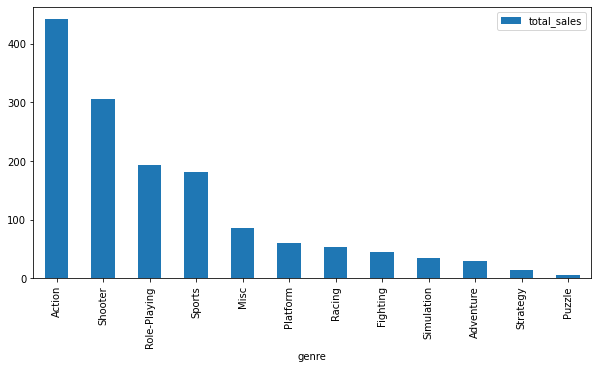

In [48]:
(df_relevant
 .pivot_table(index='genre', aggfunc={'total_sales':sum})
 .sort_values(by='total_sales', ascending=False)
 .plot(y='total_sales', kind='bar', figsize=(10, 5))
);

Видим, что наиболее прдоваемые жанры это: Action, Shooter, Role-playing, Sports.
Оценка по общим продажам очень специфична, т.к. компания может одной игрой заработать больше, чем несколькими другими. Чтобы обезопасить от таких аномалий, воспользуемся медианой

Посмотрим как распределяется медиана продажи в зависимости от жанра игры:

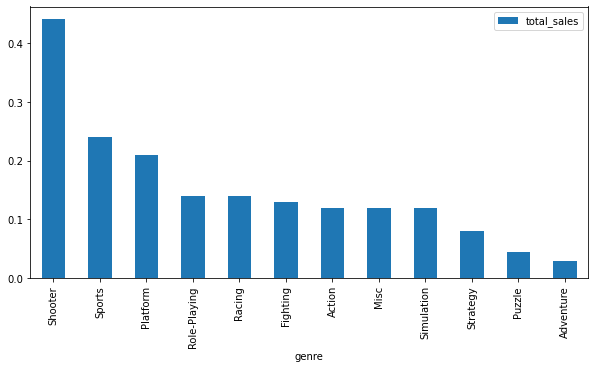

In [49]:
(df_relevant
 .pivot_table(index='genre', values = 'total_sales', aggfunc='median')
 .sort_values(by='total_sales', ascending=False)
 .plot(y='total_sales', kind='bar', figsize=(10, 5))
);

Посмотрим как распределяется средние продажи в зависимости от жанра игры:

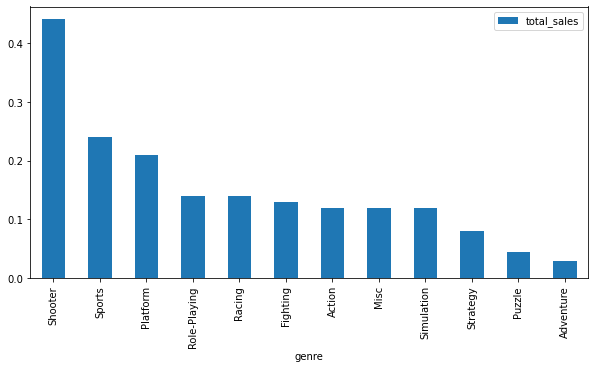

In [50]:
(df_relevant
 .pivot_table(index='genre', values = 'total_sales', aggfunc='median')
 .sort_values(by='total_sales', ascending=False)
 .plot(y='total_sales', kind='bar', figsize=(10, 5))
);

В подтверждении ранее сказанных слов, видим, что сформировалась новая тройка ТОП-3: Shooter, Sports, Platform

# Шаг 4 Портрет пользователя

Составим портрет пользователя для каждого региона (NA, EA, JP)

## 4.1 Топ-5 платформ

Для каждого региона посчитаем суммарные продажи по платформам и определим 5 самых популярных

In [51]:
top5_platforms_per_region = (df_relevant
        .pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
       )
   
top5_platforms_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Построим графики распределения продаж по платформам оставив самые популярные:

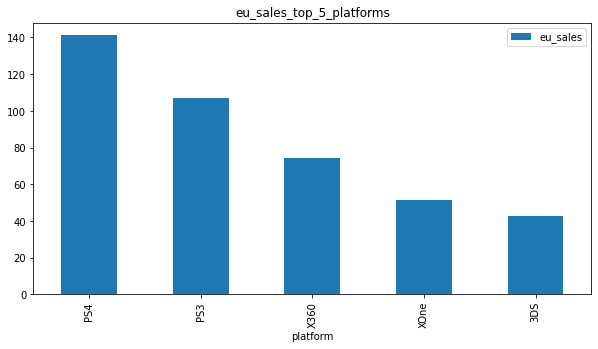

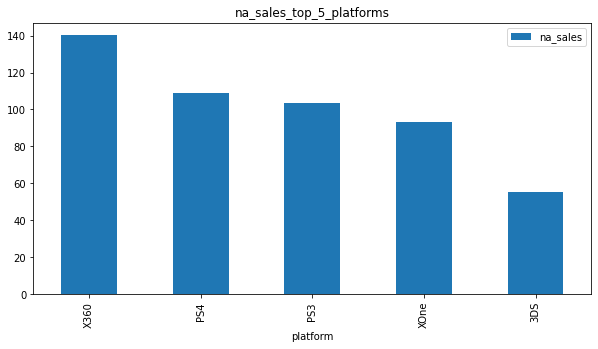

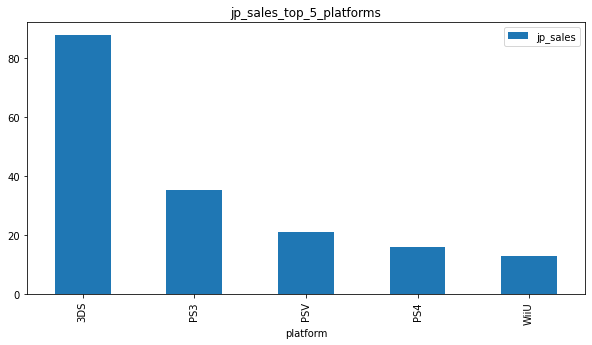

In [52]:
# список регионов для цикла
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (top5_platforms_per_region
     .sort_values(by=region[i], ascending=False)
     .head(5)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_platforms')
    )


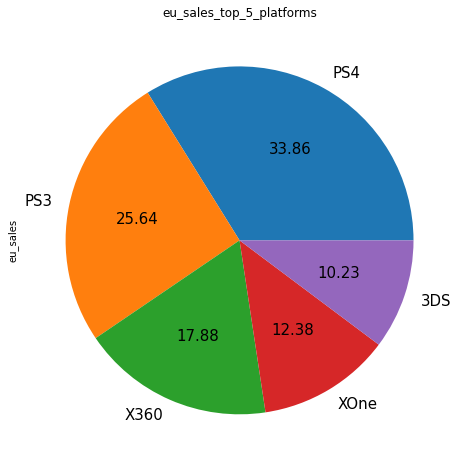

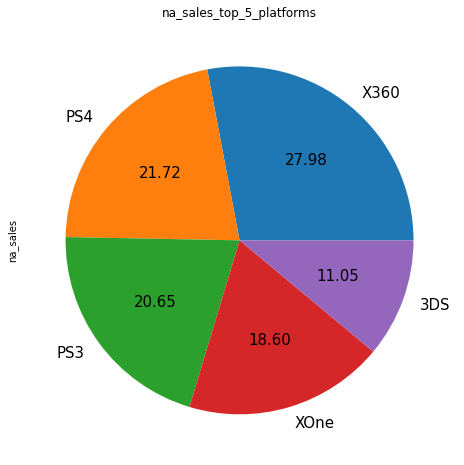

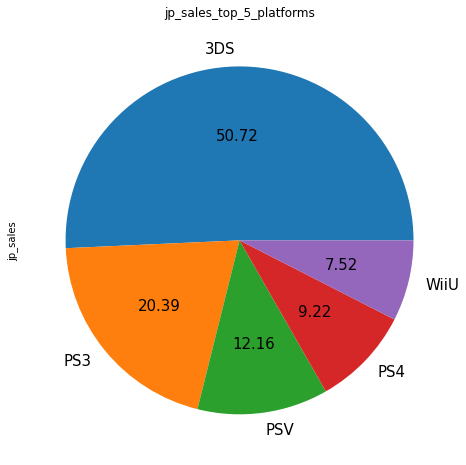

In [53]:

# список регионов для цикла
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (top5_platforms_per_region
     .sort_values(by=region[i], ascending=False)
     .head(5)
     .plot(y=region[i], kind='pie', figsize=(8, 8), title=region[i]+'_top_5_platforms', legend=False, autopct='%.2f', fontsize=15)
    )

В Европе самая популярная платформа PS4, в Северной Америке X360, в Японии - Nintendo 3DS. Американцы и японцы поддерживают своих производителей

## 4.2 Топ-5 жанорв

Для каждого региона посчитаем суммарные продажи по жанрам и определим 5 самых популярных

In [54]:
top5_genre_per_region = (df_relevant
        .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')
       )
   
top5_genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,0.020,0.01,0.02
Adventure,0.000,0.01,0.00
Fighting,0.020,0.03,0.05
Misc,0.015,0.02,0.01
Platform,0.080,0.00,0.09
Puzzle,0.010,0.00,0.00
Racing,0.090,0.00,0.04
Role-Playing,0.010,0.06,0.02
Shooter,0.170,0.00,0.20


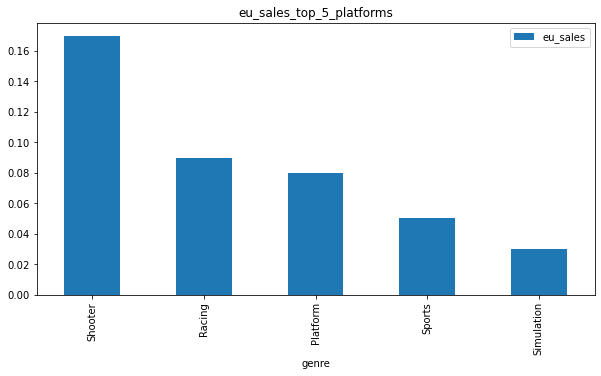

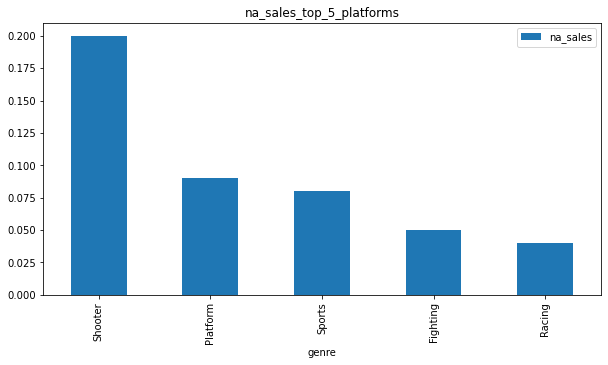

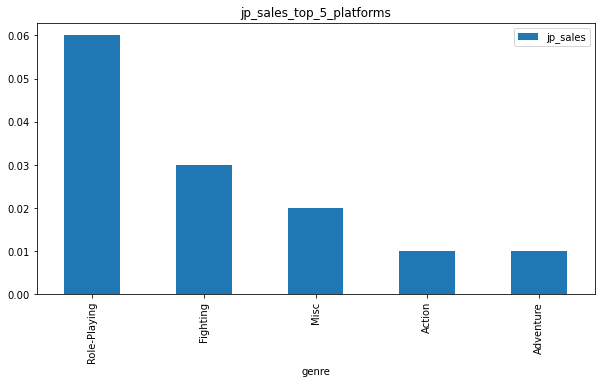

In [55]:
for i in range(0, 3):
    (top5_genre_per_region
     .sort_values(by=region[i], ascending=False)
     .head(5)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_platforms')
    )


Пользователи Европы и Северной Америки практически идентичны, но с точки зрения популярности расположены по-разному, также имеется разница в двух  жанрах: в Европе это simulation, а в Северной Америке - Fighting. Пользователи Японии предпочитают ролевые игры. В Европе и Северной Америке лидер в продажах с большим и резким отрывом от остальных жанров является Shooter, в то время как в Японии - Role-Playing

## 4.3 Рейтинг ESRB

Аналогично посмотрим как влияет рейтинг на продажи в каждом регионе.

In [56]:
rating_sum = df_relevant.pivot_table(index='rating',  aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
  
rating_sum

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


In [57]:
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


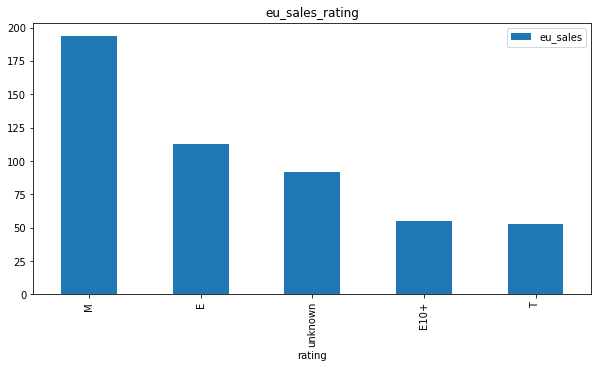

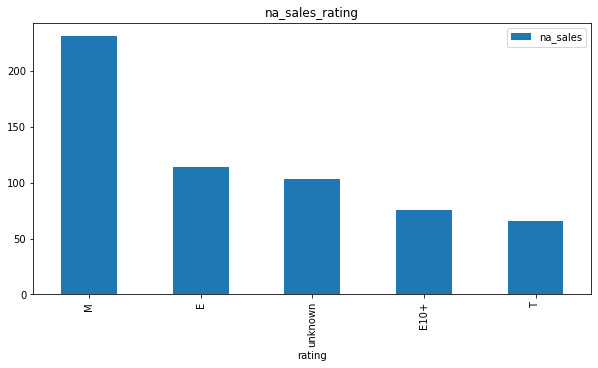

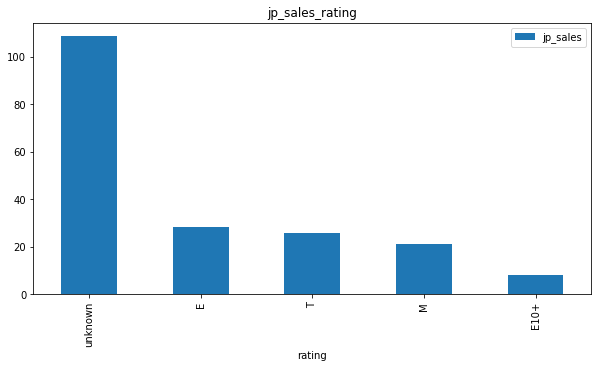

In [58]:
for i in range(0, 3):
    (rating_sum
     .sort_values(by=region[i], ascending=False)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_rating')
    )

В Америке и Европе идентичное распределение продаж в зависимости от рейтингов: преобладают, с большим отрывом, игры для взрослых, далее игры для всех, на третьем месте игры с неизвестным рейтингом и замыкают игры 13+.
В Японии все опять не так: лидируют игры с неизвестным рейтингом с большим отрывом, меньше всего популярны игры 10+.

В целом можно сказать, что американцы и европейцы схожи в выборе платформ, жанров и возрастного рейтинга игр. Т.е. портреты пользователей идентичны.
Японцы сильно отличаются в предпочтениях от западных игроков, в некоторых случаях диаметрально.

# Шаг 5 Проверка гипотез

## 5.1 Первая гипотеза

Первая гипотеза которую нужно проверить - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - средние пользовательские рейтинги платформ Xbox One и PC равны (в H0 всегда используется знак равенства);
* H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC .
Альтернативная гипотеза у нас двусторонняя, т.к. средний рейтинг может отличаться от как в большую так и в меньшую сторону.

Чтобы проверить гипотезу о равенстве средних двух выборок применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать).

In [59]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски
# чтобы они не влияли на распределения
xbox_one_ttest = df_relevant[(df_relevant['platform']=='XOne')&(df_relevant['user_score'] >= 0)]['user_score']
pc_ttest = df_relevant[(df_relevant['platform']=='PC')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия платформы Xbox One:', round(xbox_one_ttest_var, 2))
print()
print('Дисперсия платформы PC:', round(pc_ttest_var, 2))

Дисперсия платформы Xbox One: 1.91

Дисперсия платформы PC: 2.77


In [60]:
pc_ttest.mean()

6.428640776699027

Разница между дисперсиями выборок составляет 0,86, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False

In [61]:
# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


р-уровень значимости составил почти 55%, что значительно выше 5% => средний рейтинг платформ Xbox One и PC статистически значимо не отличается

## 5.2 Вторая гипотеза

Вторая гипотеза для проверки звучит так - средние пользовательские рейтинги жанров Action и Sports разные.

* H0 - средние пользовательские рейтинги жанров Action и Sports равны (в H0 всегда используется знак равенства);
* H1 - средние пользовательские рейтинги жанров Action и Sports различаются

В этой гипотезе нам также нужно сравнить средние двух выборок, поэтому применим тот же тест ttest_ind

In [62]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски
# чтобы они не влияли на распределения

action_ttest = df_relevant[(df_relevant['genre']=='Action')&(df_relevant['user_score'] >= 0)]['user_score']
sports_ttest = df_relevant[(df_relevant['genre']=='Sports')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия жанра Action:', round(action_ttest_var, 2))
print()
print('Дисперсия жанра Sports:', round(sports_ttest_var, 2))

Дисперсия жанра Action: 1.89

Дисперсия жанра Sports: 3.02


Разница между дисперсиями выборок составляет 1,13, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False

In [63]:
# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются

# Вывод

Проведя исследовательский анализ данных о продажах видеоигр в мире можно сказать следующее:

* В первую очередь следует обратить внимание на потенциально прибыльные игровые платформы. Таковыми являются PS4, 3DS, XOne, PC, PSV т.к. у них наблюдается рост, а у платформ: PS3 и WiiU наблюдается стабильность. Продажи по платформам 'X360', 'Wii' падают, но все еще могут принести некоторую прибыль. Нужно иметь ввиду что в разных регионах популярные платформы могут отличаться, например платформа 3DS очень популярна в Японии, но менее популярна в Европе и Америке. Платформы 3DS, PS3, PS4 популярны во всех регионах.
* Среди жанров видеоигр также можно выделить наиболее популярные и перспективные, например жанр Shooter перспективный во всех регионах, а также жанры Platform, Racing, Role-Playing Figthings являются потенциально прибыльными и следует учесть это при планировании.
* К сожелению очень многие игры не имеют рейтинга ESRB, поэтому данные анализа здесь не совсем полные и корректные. Но даже сейчас можно сказать, что среди игроков Европы и Северной Америки наибеолее популярны игры для взрослых и для любого возраста. В то время как в Японии с большим отрывом лидируют игры, для которых рейтинг неустановлен.
* Умеренное влияние на продажи игр оказывают их оценки. Оценки делятся на оценки критиков и пользователей. Мы выявили, что оценки критиков имеют заметную связь с продажами, в отличае от  умеренной связи продаж с оценкам пользователей. Поэтому стоит учитывать только оценки критиков. При этом нами была выявлена закономерность: продажи видеоигр начинают активно расти при оценки критиков от 60 пунктов и выше.
* В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и можно объеденить усилия и рекламный контент для этих направлений. Но необходимо более тщательно подготовить компанию в Японии.
* Рекомендация сосредоточить все силы на Европе и Севепной Америке. Но если ресурсы нашей компании очень большие, то подключить и азиатский регион, возможно лучше нанять человека инсайдера, живущего в непосредственно в Японии для консультаций.